<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-WT" data-toc-modified-id="Model-WT-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model WT</a></span></li><li><span><a href="#Model-Braf-mutation" data-toc-modified-id="Model-Braf-mutation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model Braf mutation</a></span></li><li><span><a href="#Model-Ras-mutation" data-toc-modified-id="Model-Ras-mutation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Ras mutation</a></span></li><li><span><a href="#Model-EGFR-mutation" data-toc-modified-id="Model-EGFR-mutation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model EGFR mutation</a></span></li><li><span><a href="#RasGAP-loss" data-toc-modified-id="RasGAP-loss-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>RasGAP loss</a></span></li></ul></div>

In [1]:
import os
import sys

# os.chdir("/Users/e.bosdriesz/Dropbox/projects/cnr/orton/")

import pickle
import numpy as np
import odemod
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
np.set_printoptions(precision=3, suppress=1, linewidth=150)

###############################################################################
# INPUTS
fModelDict = 'ortonModelExtendedDictionary.pkl'


###############################################################################
# STATEMENTS

# Importing the model
with open(fModelDict, 'rb') as handle:
    mDict = pickle.load(handle, encoding='latin1')


# Model WT 

Use simulated knockdowns as perturbations. KD are simulated by reducing the initial amount of inactive protein (since all active amounts are 0 at t=0).

In [2]:
knockdown = [
    'species_3', # Module 1: SOS
    'species_5',  # Module 2: Ras
    'species_7',  # Module 3: Raf
    'species_9',  # Module 4: Mek
    'species_11', # Module 5: Erk
    'species_13', # Module 6: P90Rsk
    'species_15',  # Module 7: PI3K
    'species_17',  # Module 8: Akt
    'species_20',  # Module 9: C3G
    'species_22',  # Module 10: Rap1
    'species_24'   # Module 11: bRaf
]

simWT = odemod.SimPerturbations(mDict)

# Module 0: EGFR. Model perturbation by reducing production rate
newval = 0.5 * simWT.param['v']
simWT.addPerturbation('v', newval)

for s in knockdown:
    simWT.addKnockdown(s, 0.5)

In [4]:
# Set perturbation target by hand because 'v' not recognized as parameter
simWT.perturbations[0] = ['species_0']

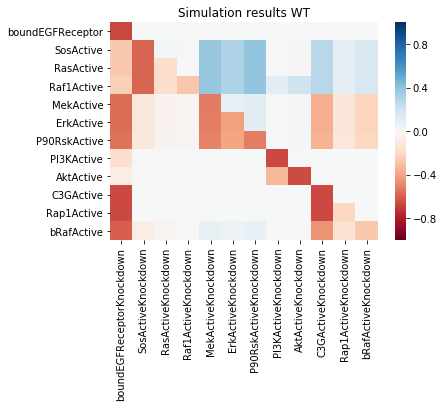

In [8]:
rglob_wt = pd.DataFrame(
    simWT.rglob,
    index = [simWT.get_species_names(n) for n in simWT.nodes],
    columns = [simWT.get_species_names(n[0])+'Knockdown' for n in simWT.perturbations]
)

sns.heatmap(rglob_wt, vmin=-1, vmax=1, cmap='RdBu'); 
plt.title("Simulation results WT");
rglob_wt.to_csv('results/simulations/ortonModel-knockdown-mutWT.tsv', sep='\t')

# Model Braf mutation

In [9]:
simBRAF = odemod.SimPerturbations(mDict)
# No (de)-activation of BRaf
# Kcat_25 = Activation by Rap1
# Kcat_26 = Activation by Ras
# Kcat_30 = deactivation by p'ase
simBRAF.setParam(['Kcat_25', 'Kcat_26', 'Kcat_30'], [0, 0, 0])
# BRafInactive absent. All Braf is active.
simBRAF.setInit(['species_23', 'species_24'], [120000, 0])

simBRAF.update_refSS()

knockdown = [
    'species_3', # Module 1: SOS
    'species_5',  # Module 2: Ras
    'species_7',  # Module 3: Raf
    'species_9',  # Module 4: Mek
    'species_11', # Module 5: Erk
    'species_13', # Module 6: P90Rsk
    'species_15',  # Module 7: PI3K
    'species_17',  # Module 8: Akt
    'species_20',  # Module 9: C3G
    'species_22',  # Module 10: Rap1
    # 'species_24'   # Module 11: bRaf
    'species_23' # Module 11: BRAF (use active BRAF instead of inactive BRAF).
]



# Module 0: EGFR. Model perturbation by reducing production rate
newval = 0.5 * simBRAF.param['v']
simBRAF.addPerturbation('v', newval)

for s in knockdown:
    simBRAF.addKnockdown(s, 0.5)


In [10]:
# Set perturbation target by hand because 'v' not recognized as parameter
simBRAF.perturbations[0] = ['species_0']

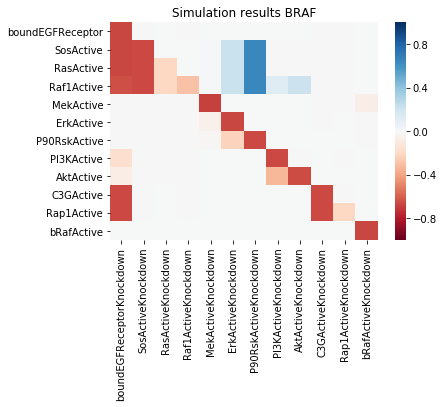

In [12]:
rglob_braf = pd.DataFrame(
    simBRAF.rglob,
    index = [simBRAF.get_species_names(n) for n in simBRAF.nodes],
    columns = [simBRAF.get_species_names(n[0])+'Knockdown' for n in simBRAF.perturbations]
)
sns.heatmap(rglob_braf, vmin=-1, vmax=1, cmap='RdBu')
plt.title("Simulation results BRAF")
rglob_braf.to_csv('results/simulations/ortonModel-knockdown-mutBRAF.tsv', sep='\t')


# Model Ras mutation

In [13]:
simRas = odemod.SimPerturbations(mDict)
# No (de)-activation of Ras
simRas.setParam(['Kcat_03', 'Kcat_04'], [0, 0])
# RasInactive absent. All Ras is active.
simRas.setInit(['species_4', 'species_5'],[120000, 0])

simRas.update_refSS()

knockdown = [
    'species_3', # Module 1: SOS
    # 'species_5',  # Module 2: Ras (use active RAS instead of inactive RAS).
    'species_4',   # Active Ras
    'species_7',  # Module 3: Raf 
    'species_9',  # Module 4: Mek
    'species_11', # Module 5: Erk
    'species_13', # Module 6: P90Rsk
    'species_15',  # Module 7: PI3K
    'species_17',  # Module 8: Akt
    'species_20',  # Module 9: C3G
    'species_22',  # Module 10: Rap1
    'species_24',   # Module 11: bRaf
]



# Module 0: EGFR. Model perturbation by reducing production rate
newval = 0.5 * simRas.param['v']
simRas.addPerturbation('v', newval)

for s in knockdown:
    simRas.addKnockdown(s, 0.5)



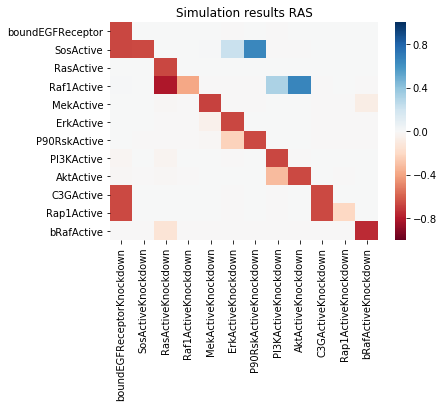

In [14]:
# Set perturbation target by hand because 'v' not recognized as parameter
simRas.perturbations[0] = ['species_0']

rglob_ras = pd.DataFrame(
    simRas.rglob,
    index = [simRas.get_species_names(n) for n in simRas.nodes],
    columns = [simRas.get_species_names(n[0])+'Knockdown' for n in simRas.perturbations]
)
sns.heatmap(rglob_ras, vmin=-1, vmax=1, cmap='RdBu')
plt.title("Simulation results RAS")
rglob_ras.to_csv('results/simulations/ortonModel-knockdown-mutRAS.tsv', sep='\t')


# Model EGFR mutation

In [15]:
simEGFR = odemod.SimPerturbations(mDict)
# No (de)-activation of EGFR
# * k1_00: EGF-EGFR-free binding
# * k2_00: EGF-EGFR unbiding
# * k1_20: EGFR degradation
# * k1_29: free EGFR degradation
# * v:     EGFR production
simEGFR.setParam(['k1_00', 'k2_00', 'k1_20', 'k1_29', 'v'], [0, 0, 0, 0, 0])
# All EGFR is Active.
simEGFR.setInit(['species_0', 'species_1'], [80000, 0])

simEGFR.update_refSS()


knockdown = [
    # Now, add EGFR as knockdown
    'species_0', 
    'species_3', # Module 1: SOS
    'species_5',  # Module 2: Ras
    'species_7',  # Module 3: Raf 
    'species_9',  # Module 4: Mek
    'species_11', # Module 5: Erk
    'species_13', # Module 6: P90Rsk
    'species_15',  # Module 7: PI3K
    'species_17',  # Module 8: Akt
    'species_20',  # Module 9: C3G
    'species_22',  # Module 10: Rap1
    'species_24'   # Module 11: bRaf
    # 'species_23' # Module 11: BRAF (use active BRAF instead of inactive BRAF).
]


for s in knockdown:
    simEGFR.addKnockdown(s, 0.5)


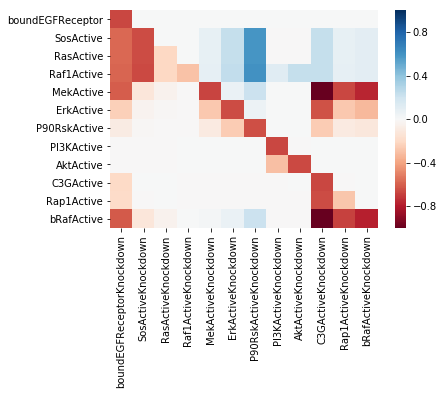

In [16]:
rglob_egfr = pd.DataFrame(
    simEGFR.rglob,
    index = [simEGFR.get_species_names(n) for n in simEGFR.nodes],
    columns = [simEGFR.get_species_names(n[0])+'Knockdown' for n in simEGFR.perturbations]
)
sns.heatmap(rglob_egfr, vmin=-1, vmax=1, cmap='RdBu')
rglob_egfr.to_csv('results/simulations/ortonModel-knockdown-mutEGFR.tsv', sep='\t')